In [1]:
import sys
sys.path.append('../src')

from models.ViTL16Model.train_cv import train_cv as train_ViTL16Model
from models.ViTL16Model.predict import predict as predict_ViTL16Model

from utils.show_graph import plot_history

In [3]:
package_model_path, loss_history, auc_history = train_ViTL16Model(
    num_epochs=25,
    learning_rate=1e-05,
    batch_size=4,
    n_splits=5,
    use_flozen=True,
    seed=2023,
    start_fold=4
)

[DEBUG] 2023-09-16 02:36:40 - Batch size: 4
[DEBUG] 2023-09-16 02:36:40 - Learning rate: 1e-05
[DEBUG] 2023-09-16 02:36:40 - Number of epochs: 25
[DEBUG] 2023-09-16 02:36:40 - Seed: 2023
[DEBUG] 2023-09-16 02:36:40 - Minimum learning rate: 1e-06
[DEBUG] 2023-09-16 02:36:40 - Number of splits: 5
[DEBUG] 2023-09-16 02:36:40 - Pretrained: True
[DEBUG] 2023-09-16 02:36:40 - Use flozen: True
[DEBUG] 2023-09-16 02:36:40 - Start fold: 4
[DEBUG] 2023-09-16 02:36:40 - Fold: 5/5
[DEBUG] 2023-09-16 02:36:40 - ----------------------------------------
[DEBUG] 2023-09-16 02:36:42 - Using device: cuda(NVIDIA GeForce RTX 3080)
[DEBUG] 2023-09-16 02:36:42 - Starting training on cuda at 2023-09-16 02:36:42
[DEBUG] 2023-09-16 02:36:42 - Model: VisionTransformer
[DEBUG] 2023-09-16 02:36:42 - Model parameters:
[DEBUG] 2023-09-16 02:36:43 - class_token: torch.Size([1, 1, 1024])
[DEBUG] 2023-09-16 02:36:43 - conv_proj.weight: torch.Size([1024, 3, 16, 16])
[DEBUG] 2023-09-16 02:36:43 - conv_proj.bias: torch.S

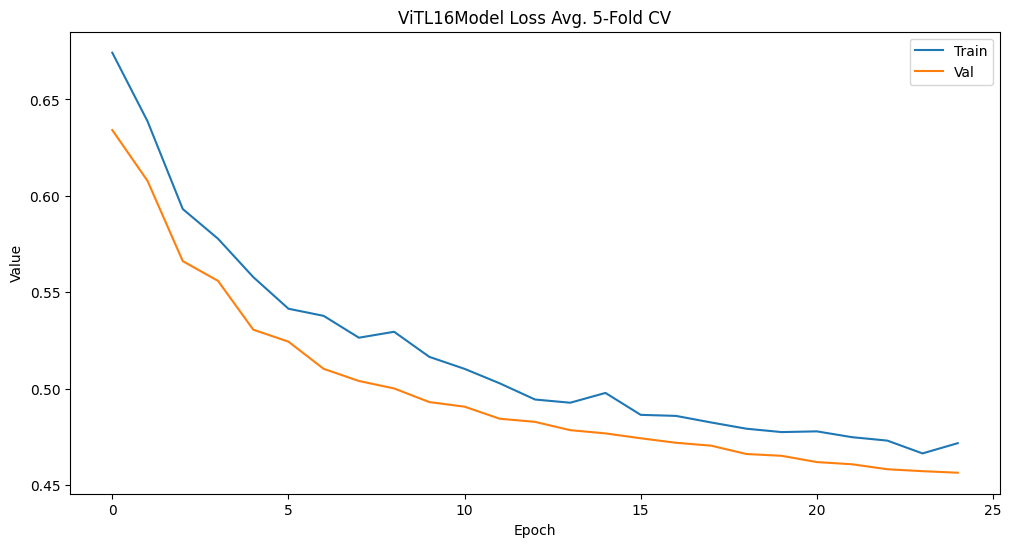

In [4]:
plot_history(loss_history, "ViTL16Model Loss Avg. 5-Fold CV")

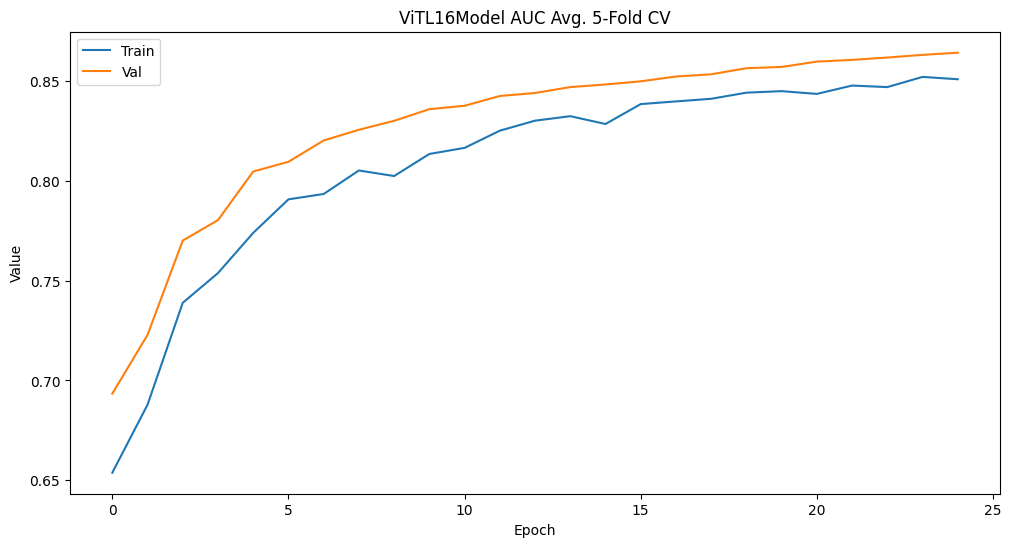

In [5]:
plot_history(auc_history, "ViTL16Model AUC Avg. 5-Fold CV")

In [2]:
best_auc_model_paths = [
  "d:/repo/tkser/technopro-food-package/src/data/models/ViTL16Model_cv/visiontransformer_20230915213511_epoch_25_auc_0.8452.pth",
  "d:/repo/tkser/technopro-food-package/src/data/models/ViTL16Model_cv/visiontransformer_20230915223737_epoch_25_auc_0.8475.pth",
  "d:/repo/tkser/technopro-food-package/src/data/models/ViTL16Model_cv/visiontransformer_20230915233938_epoch_25_auc_0.8310.pth",
  "d:/repo/tkser/technopro-food-package/src/data/models/ViTL16Model_cv/visiontransformer_20230916004210_epoch_25_auc_0.8296.pth",
  "d:/repo/tkser/technopro-food-package/src/data/models/ViTL16Model_cv/visiontransformer_20230916023642_epoch_25_auc_0.8640.pth"
]

import pandas as pd
sample_submission = pd.read_csv("../src/data/input/sample_submit.csv", header=None, names=['image_name', 'label'])
sample_submission.drop('label', axis=1, inplace=True)

for fold, best_auc_model_path in enumerate(best_auc_model_paths):
  _, y_pred = predict_ViTL16Model(
    model_path=best_auc_model_path,
    batch_size=4,
    seed=2023,
    use_tta=True
  )
  sample_submission[f'fold_{fold}'] = y_pred

sample_submission['label'] = sample_submission.iloc[:, 1:].mean(axis=1)
sample_submission.drop(sample_submission.columns[1:-1], axis=1, inplace=True)

sample_submission.to_csv('../src/data/output/submit_vitl16model_ensamble_2023_epoch_25_auc_0.8492.csv', index=False, header=False)

[DEBUG] 2023-09-16 04:04:06 - Starting prediction on cuda
[DEBUG] 2023-09-16 04:04:06 - Using TTA: True
[DEBUG] 2023-09-16 04:04:06 - TTA Transforms: <ttach.base.Compose object at 0x0000015D666179D0>
Prediction: 100%|██████████| 545/545 [26:09<00:00,  2.88s/it]
[DEBUG] 2023-09-16 04:30:15 - Finished prediction
[DEBUG] 2023-09-16 04:30:19 - Starting prediction on cuda
[DEBUG] 2023-09-16 04:30:19 - Using TTA: True
[DEBUG] 2023-09-16 04:30:19 - TTA Transforms: <ttach.base.Compose object at 0x0000015D6FB1FA90>
Prediction: 100%|██████████| 545/545 [25:41<00:00,  2.83s/it]
[DEBUG] 2023-09-16 04:56:00 - Finished prediction
[DEBUG] 2023-09-16 04:56:02 - Starting prediction on cuda
[DEBUG] 2023-09-16 04:56:02 - Using TTA: True
[DEBUG] 2023-09-16 04:56:02 - TTA Transforms: <ttach.base.Compose object at 0x0000015D67EDFAD0>
Prediction: 100%|██████████| 545/545 [25:39<00:00,  2.82s/it]
[DEBUG] 2023-09-16 05:21:42 - Finished prediction
[DEBUG] 2023-09-16 05:21:45 - Starting prediction on cuda
[DEBUG